**Sentiment Analysis Using Vader Model**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/tweets.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(1000, 7)
(500, 7)


In [ ]:
df.head()

,Tweet ID,Text,User,Created At,Likes,Retweets,Sentiment
0,449211727471646420,Feeling grateful for my friends and family.,werickson,2023-01-13 00:35:08,156,489,positive
1,519036665081652813,Going for a walk in the park.,jennybutler,2023-02-16 06:24:30,223,788,neutral
2,776023316169815671,I hate it when things don't go my way.,william88,2023-01-24 18:12:37,332,860,negative
3,674750468135750054,I hate it when things don't go my way.,lawrencebauer,2023-02-09 07:14:24,388,881,negative
4,859726107390311299,This is the best day ever!,gerald07,2023-02-28 06:55:54,255,567,positive


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


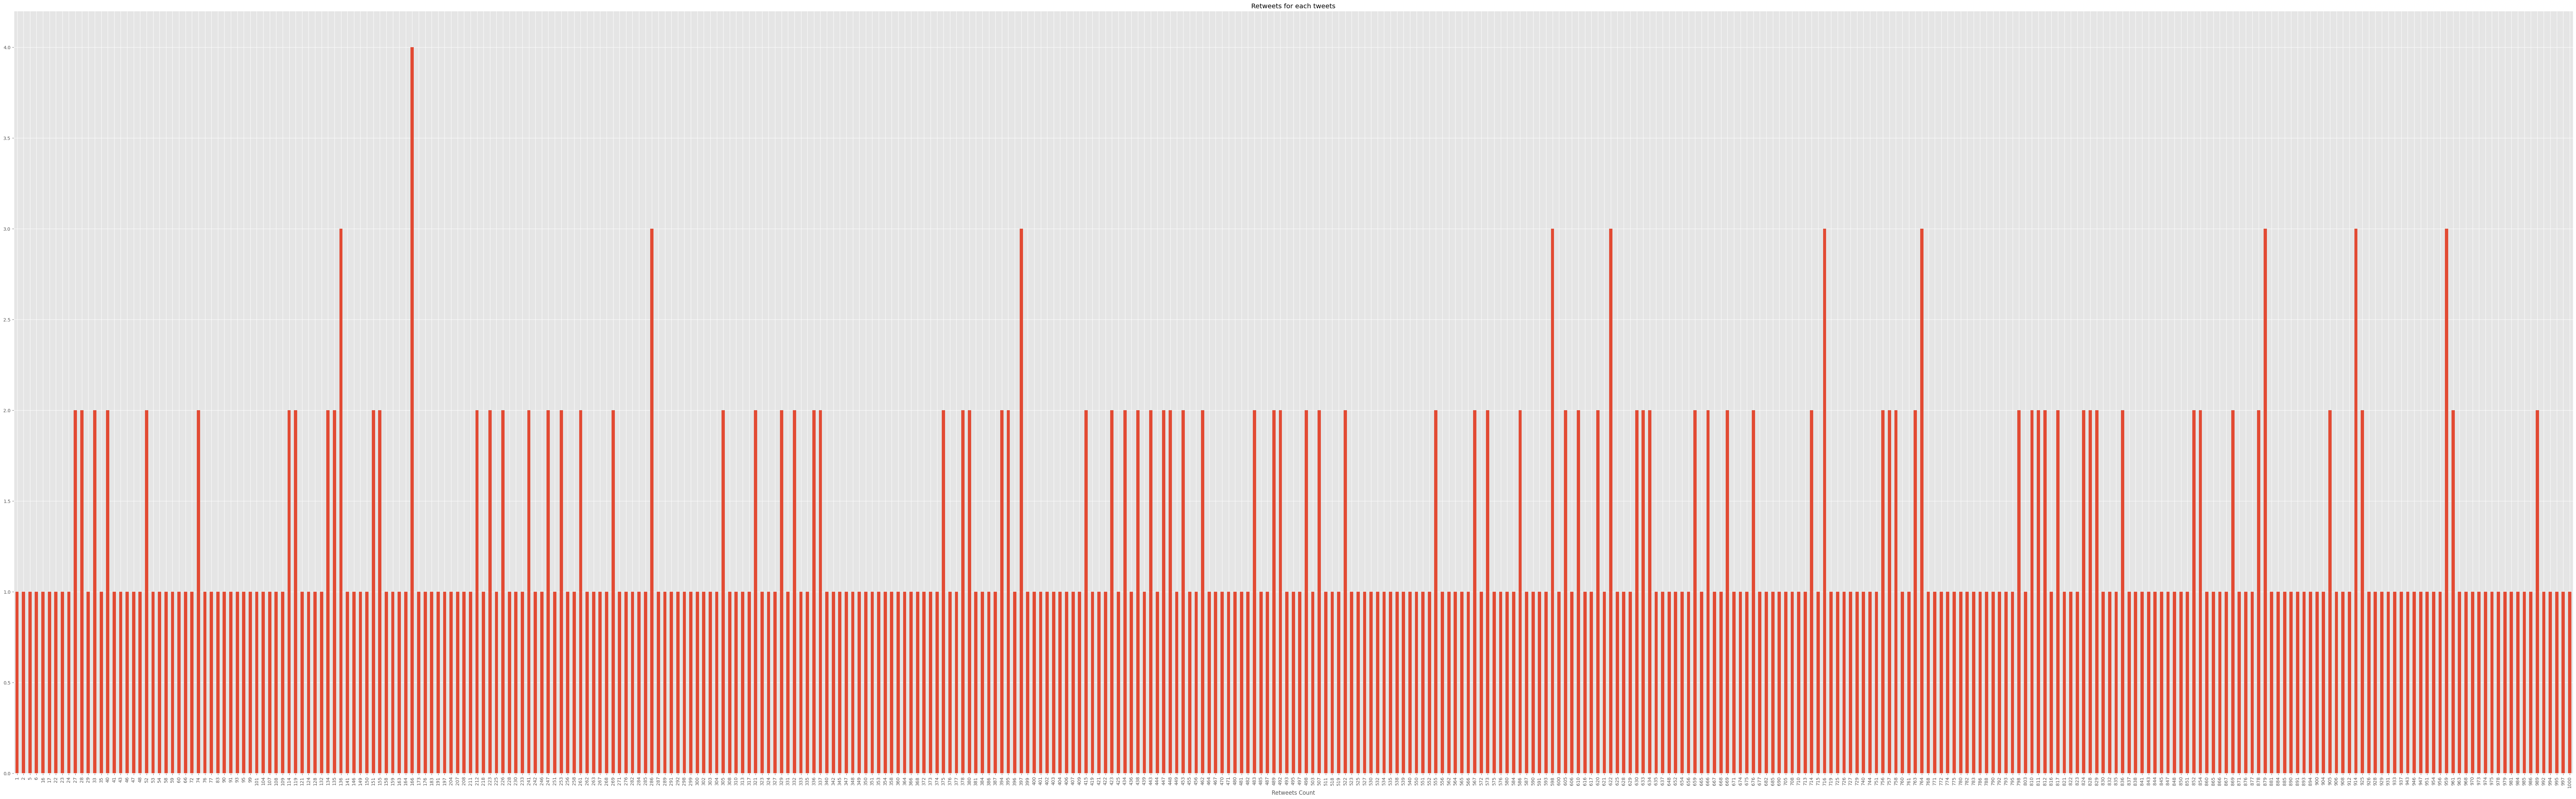

In [ ]:
ax = df['Retweets'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Retweets for each tweets',
          figsize=(100, 30))
ax.set_xlabel('Retweets Count')
plt.show()

In [ ]:
example = df['Text'][50]
print(example)

Feeling disappointed in myself.


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Feeling', 'disappointed', 'in', 'myself', '.']

In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Feeling', 'disappointed', 'in', 'myself', '.']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Feeling', 'VBG'),
 ('disappointed', 'VBN'),
 ('in', 'IN'),
 ('myself', 'PRP'),
 ('.', '.')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S Feeling/VBG disappointed/VBN in/IN myself/PRP ./.)


In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Define the preprocessing steps
stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters and URLs
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    
    # Tokenize the text into words
    tokens = word_tokenize(text)
    
    # Remove stopwords and perform stemming
    filtered_tokens = [stemmer.stem(token) for token in tokens if token not in stopwords]
    
    # Join the filtered tokens back into a sentence
    preprocessed_text = ' '.join(filtered_tokens)
    
    return preprocessed_text

# Apply the preprocessing function to the 'Text' column
df['Text'] = df['Text'].apply(preprocess_text)


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [ ]:
# This code is just to check wheather the model is working or not.
sia.polarity_scores('Today was such a beautiful day, I feel so blessed.')

{'neg': 0.0, 'neu': 0.403, 'pos': 0.597, 'compound': 0.8718}

In [ ]:
# This code is just to check wheather the model is working or not.
sia.polarity_scores("Had a terrible day at work, can't wait to go home and forget about it")

{'neg': 0.294, 'neu': 0.706, 'pos': 0.0, 'compound': -0.6124}

In [ ]:
# This code is just to check wheather the model is working on main dataset or not.
sia.polarity_scores(example)

{'neg': 0.47, 'neu': 0.303, 'pos': 0.227, 'compound': -0.3818}

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Tweet ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Tweet ID'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,Tweet ID,neg,neu,pos,compound,Text,User,Created At,Likes,Retweets,Sentiment
0,449211727471646420,0.000,0.484,0.516,0.4939,feel grate friend famili,werickson,2023-01-13 00:35:08,156,489,positive
1,519036665081652813,0.000,1.000,0.000,0.0000,go walk park,jennybutler,2023-02-16 06:24:30,223,788,neutral
2,776023316169815671,0.552,0.448,0.000,-0.5719,hate thing go way,william88,2023-01-24 18:12:37,332,860,negative
3,674750468135750054,0.552,0.448,0.000,-0.5719,hate thing go way,lawrencebauer,2023-02-09 07:14:24,388,881,negative
4,859726107390311299,0.000,0.323,0.677,0.6369,best day ever,gerald07,2023-02-28 06:55:54,255,567,positive


Mean score: 0.04
Median score: 0.00
Standard deviation: 0.48
Range: [-0.57, 0.64]


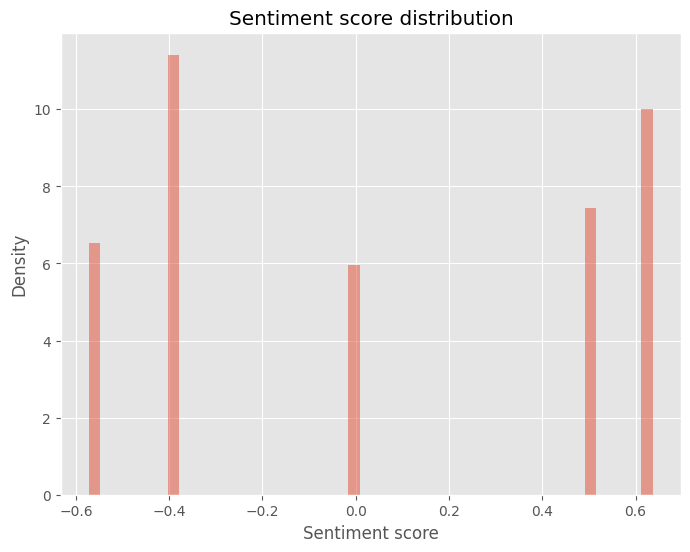

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute descriptive statistics on sentiment scores
sentiment_scores = vaders['compound']
mean_score = np.mean(sentiment_scores)
median_score = np.median(sentiment_scores)
std_score = np.std(sentiment_scores)
min_score = np.min(sentiment_scores)
max_score = np.max(sentiment_scores)
print(f"Mean score: {mean_score:.2f}")
print(f"Median score: {median_score:.2f}")
print(f"Standard deviation: {std_score:.2f}")
print(f"Range: [{min_score:.2f}, {max_score:.2f}]")

# Plot sentiment score distribution
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(sentiment_scores, bins=50, density=True, alpha=0.5)
ax.set_xlabel("Sentiment score")
ax.set_ylabel("Density")
ax.set_title("Sentiment score distribution")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate predicted sentiment labels based on Vader compound scores
vaders['predicted_sentiment'] = vaders['compound'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

# Calculate evaluation metrics
accuracy = accuracy_score(df['Sentiment'], vaders['predicted_sentiment'])
precision = precision_score(df['Sentiment'], vaders['predicted_sentiment'], average='weighted')
recall = recall_score(df['Sentiment'], vaders['predicted_sentiment'], average='weighted')
f1 = f1_score(df['Sentiment'], vaders['predicted_sentiment'], average='weighted')

# Calculate macro average
macro_precision = precision_score(df['Sentiment'], vaders['predicted_sentiment'], average='macro')
macro_recall = recall_score(df['Sentiment'], vaders['predicted_sentiment'], average='macro')
macro_f1 = f1_score(df['Sentiment'], vaders['predicted_sentiment'], average='macro')

# Calculate weighted average
weighted_avg = (precision + recall + f1) / 3

# Calculate macro average
macro_avg = (macro_precision + macro_recall + macro_f1) / 3

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Macro Avg: {:.2f}".format(macro_avg))
print("Weighted Avg: {:.2f}".format(weighted_avg))


Accuracy: 0.92
Precision: 0.94
Recall: 0.92
F1 Score: 0.92
Macro Avg: 0.91
Weighted Avg: 0.93


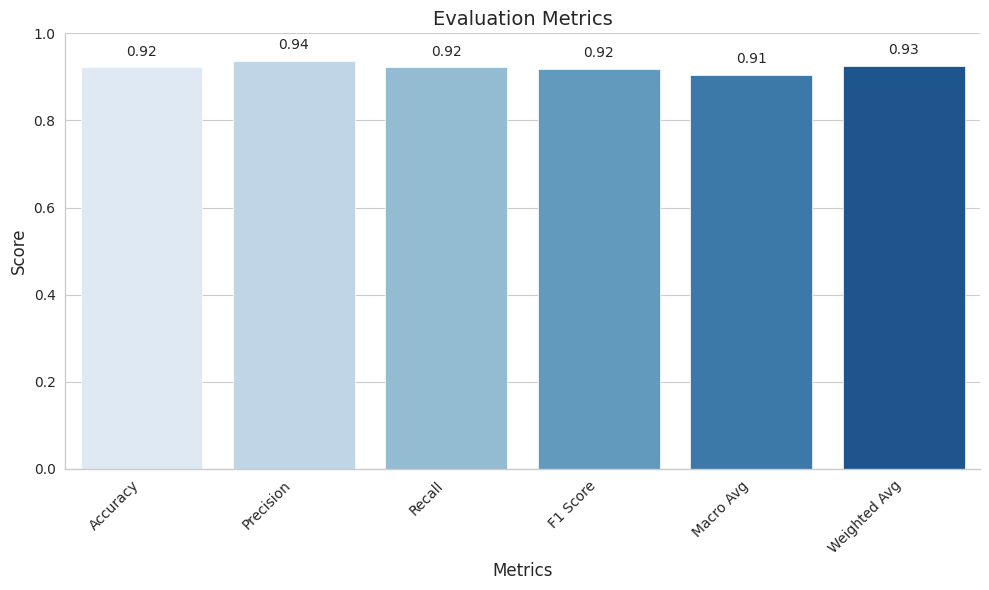

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate evaluation metrics
accuracy = accuracy_score(df['Sentiment'], vaders['predicted_sentiment'])
precision = precision_score(df['Sentiment'], vaders['predicted_sentiment'], average='weighted')
recall = recall_score(df['Sentiment'], vaders['predicted_sentiment'], average='weighted')
f1 = f1_score(df['Sentiment'], vaders['predicted_sentiment'], average='weighted')

# Calculate macro average
macro_precision = precision_score(df['Sentiment'], vaders['predicted_sentiment'], average='macro')
macro_recall = recall_score(df['Sentiment'], vaders['predicted_sentiment'], average='macro')
macro_f1 = f1_score(df['Sentiment'], vaders['predicted_sentiment'], average='macro')

# Calculate weighted average
weighted_avg = (precision + recall + f1) / 3

# Calculate macro average
macro_avg = (macro_precision + macro_recall + macro_f1) / 3

# Create labels for the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Macro Avg', 'Weighted Avg']
values = [accuracy, precision, recall, f1, macro_avg, weighted_avg]

# Set a custom color palette
colors = sns.color_palette('Blues')

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

# Create the bar plot
ax = sns.barplot(x=metrics, y=values, palette=colors)

# Add the values above the bars
for i, v in enumerate(values):
    ax.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Evaluation Metrics', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim([0, 1])
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=10)

# Remove spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


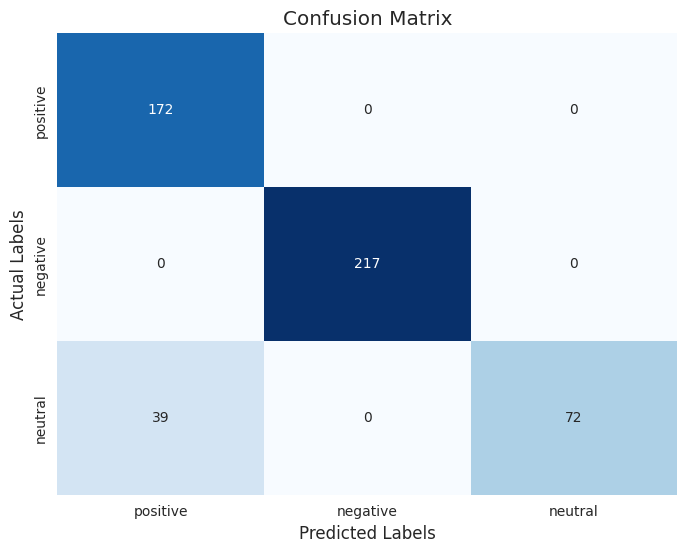

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the Vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Extract the text and sentiment label columns from the DataFrame
texts = df["Text"].tolist()
actual_labels = df["Sentiment"].tolist()

# Initialize the list for predicted sentiment labels
predicted_labels = []

# Iterate over the texts
for text in texts:
    # Perform sentiment analysis using Vader
    sentiment_score = analyzer.polarity_scores(text)
    
    # Assign the predicted label based on the compound score
    if sentiment_score['compound'] >= 0.05:
        predicted_label = "positive"
    elif sentiment_score['compound'] <= -0.05:
        predicted_label = "negative"
    else:
        predicted_label = "neutral"
    
    # Add the predicted label to the list
    predicted_labels.append(predicted_label)

# Calculate the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels, labels=["positive", "negative", "neutral"])

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=["positive", "negative", "neutral"], columns=["positive", "negative", "neutral"])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()


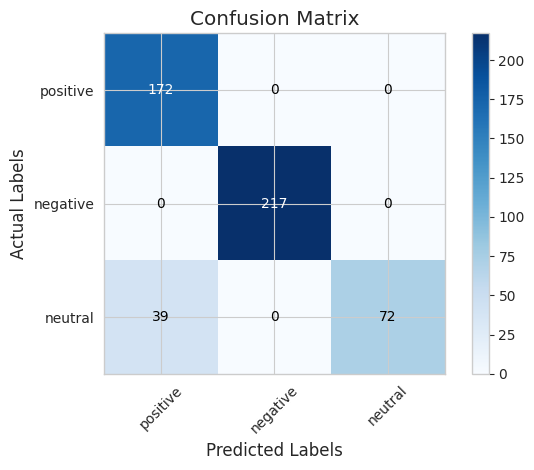

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the Vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Extract the text and sentiment label columns from the DataFrame
texts = df["Text"].tolist()
actual_labels = df["Sentiment"].tolist()

# Initialize the list for predicted sentiment labels
predicted_labels = []

# Iterate over the texts
for text in texts:
    # Perform sentiment analysis using Vader
    sentiment_score = analyzer.polarity_scores(text)
    
    # Assign the predicted label based on the compound score
    if sentiment_score['compound'] >= 0.05:
        predicted_label = "positive"
    elif sentiment_score['compound'] <= -0.05:
        predicted_label = "negative"
    else:
        predicted_label = "neutral"
    
    # Add the predicted label to the list
    predicted_labels.append(predicted_label)

# Calculate the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels, labels=["positive", "negative", "neutral"])

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=["positive", "negative", "neutral"], columns=["positive", "negative", "neutral"])

# Plot the confusion matrix
plt.imshow(cm_df, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = range(len(cm_df.columns))
plt.xticks(tick_marks, cm_df.columns, rotation=45)
plt.yticks(tick_marks, cm_df.index)

fmt = '.2f' if cm.max() < 1 else 'd'
thresh = cm.max() / 2.
for i in range(cm_df.shape[0]):
    for j in range(cm_df.shape[1]):
        plt.text(j, i, format(cm_df.iloc[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm_df.iloc[i, j] > thresh else "black")

plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.tight_layout()
plt.show()


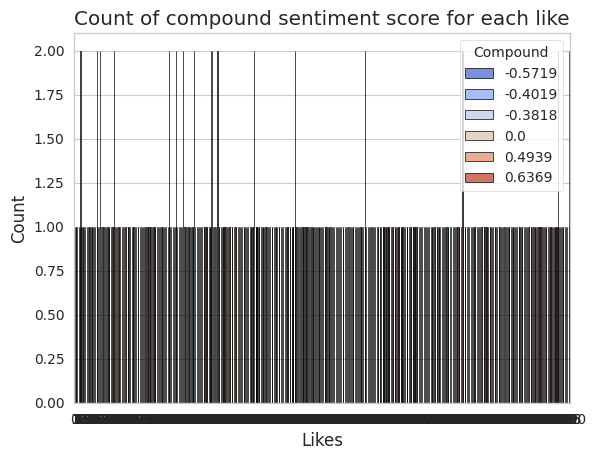

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Divide Likes column by 1
vaders['Likes'] = vaders['Likes'] // 1

# Create count plot
ax = sns.countplot(data=vaders, x='Likes', hue='compound', palette='coolwarm', edgecolor='black')

# Set title and labels
ax.set_title('Count of compound sentiment score for each like')
ax.set_xlabel('Likes')
ax.set_ylabel('Count')
ax.legend(title='Compound', loc='upper right')

# Show plot
plt.show()


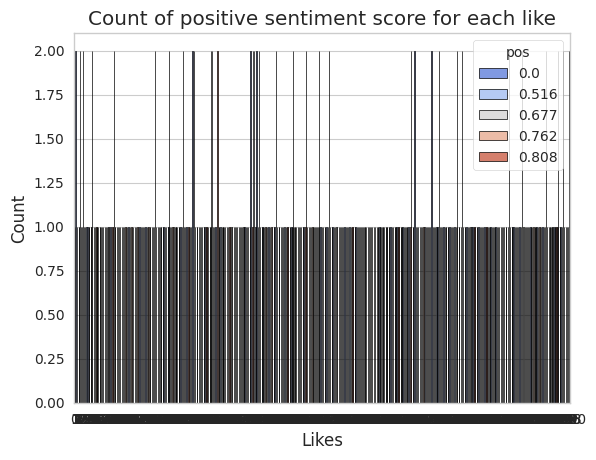

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Divide Likes column by 1
vaders['Likes'] = vaders['Likes'] // 1

# Create count plot
ax = sns.countplot(data=vaders, x='Likes', hue='pos', palette='coolwarm', edgecolor='black')

# Set title and labels
ax.set_title('Count of positive sentiment score for each like')
ax.set_xlabel('Likes')
ax.set_ylabel('Count')
ax.legend(title='pos', loc='upper right')

# Show plot
plt.show()

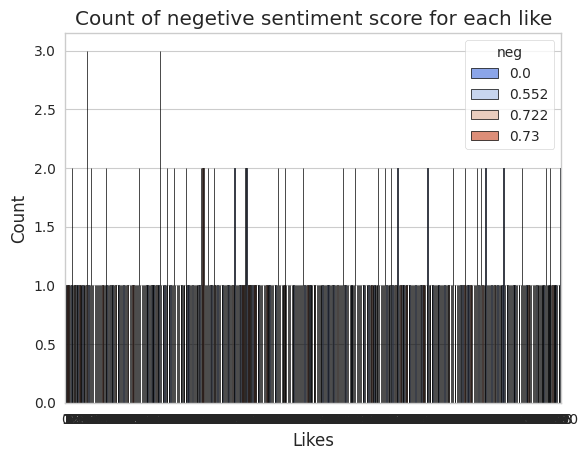

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Divide Likes column by 1
vaders['Likes'] = vaders['Likes'] // 1

# Create count plot
ax = sns.countplot(data=vaders, x='Likes', hue='neg', palette='coolwarm', edgecolor='black')

# Set title and labels
ax.set_title('Count of negetive sentiment score for each like')
ax.set_xlabel('Likes')
ax.set_ylabel('Count')
ax.legend(title='neg', loc='upper right')

# Show plot
plt.show()

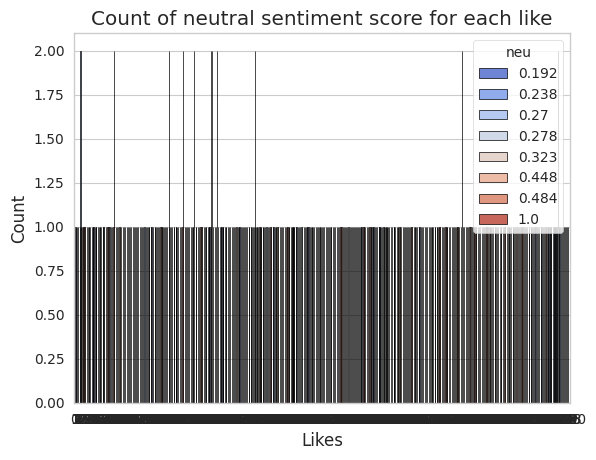

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Divide Likes column by 1
vaders['Likes'] = vaders['Likes'] // 1

# Create count plot
ax = sns.countplot(data=vaders, x='Likes', hue='neu', palette='coolwarm', edgecolor='black')

# Set title and labels
ax.set_title('Count of neutral sentiment score for each like')
ax.set_xlabel('Likes')
ax.set_ylabel('Count')
ax.legend(title='neu', loc='upper right')

# Show plot
plt.show()

**Sentiment Analysis Using Roberta Model**

In [ ]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.3 MB/s eta 0:00:00


In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
print(example)
sia.polarity_scores(example)

Feeling disappointed in myself.


{'neg': 0.47, 'neu': 0.303, 'pos': 0.227, 'compound': -0.3818}

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.9489647, 'roberta_neu': 0.046515327, 'roberta_pos': 0.00451991}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Tweet ID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Tweet ID'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.columns

Index(['Tweet ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Text', 'User',
       'Created At', 'Likes', 'Retweets', 'Sentiment'],
      dtype='object')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to convert sentiment scores to labels
def scores_to_labels(scores_dict):
    pos_score = scores_dict['roberta_pos']
    neg_score = scores_dict['roberta_neg']
    if pos_score > neg_score:
        return 'positive'
    elif neg_score > pos_score:
        return 'negative'
    else:
        return 'neutral'

# Add a predicted label column to the results dataframe
results_df['roberta_predicted'] = results_df.apply(lambda x: scores_to_labels(x[['roberta_neg', 'roberta_neu', 'roberta_pos']].to_dict()), axis=1)

# Calculate evaluation metrics
y_true = results_df['Sentiment']
y_pred = results_df['roberta_predicted']
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)

# Calculate macro average
macro_precision = precision_score(y_true, y_pred, average='macro', zero_division=1)
macro_recall = recall_score(y_true, y_pred, average='macro', zero_division=1)
macro_f1 = f1_score(y_true, y_pred, average='macro', zero_division=1)

# Calculate weighted average
weighted_avg = (precision + recall + f1) / 3

# Print results
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Macro Avg Precision: {macro_precision:.3f}")
print(f"Macro Avg Recall: {macro_recall:.3f}")
print(f"Macro Avg F1 Score: {macro_f1:.3f}")
print(f"Weighted Avg: {weighted_avg:.3f}")


Accuracy: 0.778
Precision: 0.865
Recall: 0.778
F1 Score: 0.694
Macro Avg Precision: 0.869
Macro Avg Recall: 0.667
Macro Avg F1 Score: 0.585
Weighted Avg: 0.779


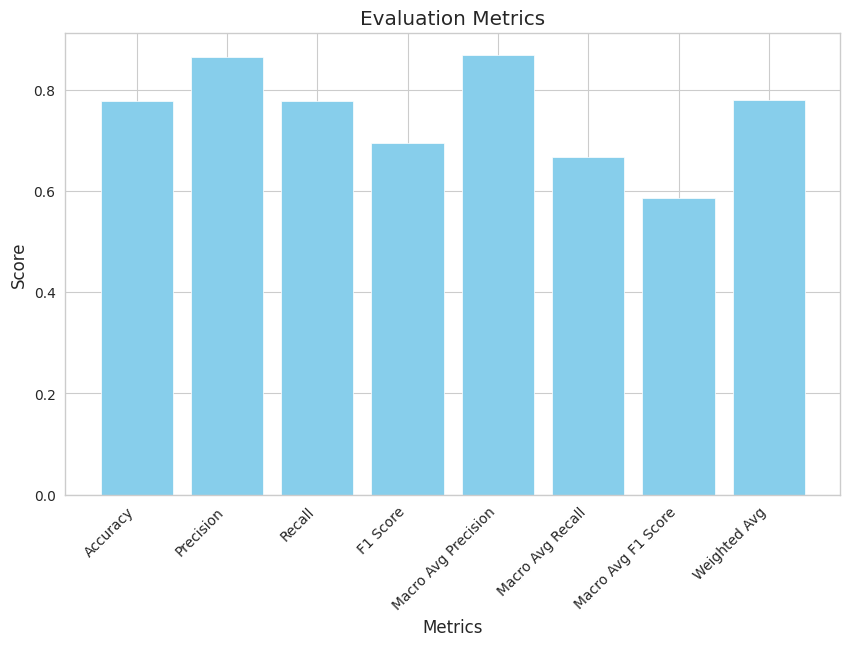

In [ ]:
import matplotlib.pyplot as plt

# Calculate evaluation metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Macro Avg Precision': macro_precision,
    'Macro Avg Recall': macro_recall,
    'Macro Avg F1 Score': macro_f1,
    'Weighted Avg': weighted_avg
}

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Define the example and labels
examples = df['Text'].tolist()
labels = df['Sentiment'].tolist()

# Initialize an empty list for predicted labels
predicted_labels = []

# Iterate over the examples
for example in examples:
    # Perform inference with the RoBERTa model
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }

    # Convert scores to predicted label
    predicted_label = scores_to_labels(scores_dict)
    
    # Add the predicted label to the list
    predicted_labels.append(predicted_label)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(labels, predicted_labels, labels=['negative', 'neutral', 'positive'])

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[217   0   0]
 [  0   0 111]
 [  0   0 172]]


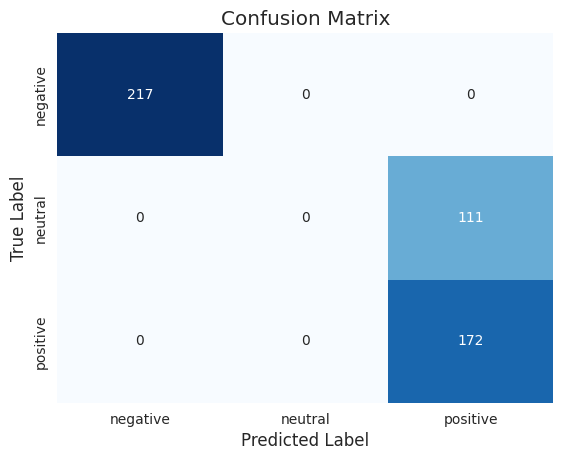

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the example and labels
examples = df['Text'].tolist()
labels = df['Sentiment'].tolist()

# Initialize an empty list for predicted labels
predicted_labels = []

# Iterate over the examples
for example in examples:
    # Perform inference with the RoBERTa model
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }

    # Convert scores to predicted label
    predicted_label = scores_to_labels(scores_dict)
    
    # Add the predicted label to the list
    predicted_labels.append(predicted_label)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(labels, predicted_labels, labels=['negative', 'neutral', 'positive'])

# Plot the confusion matrix heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])

# Add labels, title, and axis ticks
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


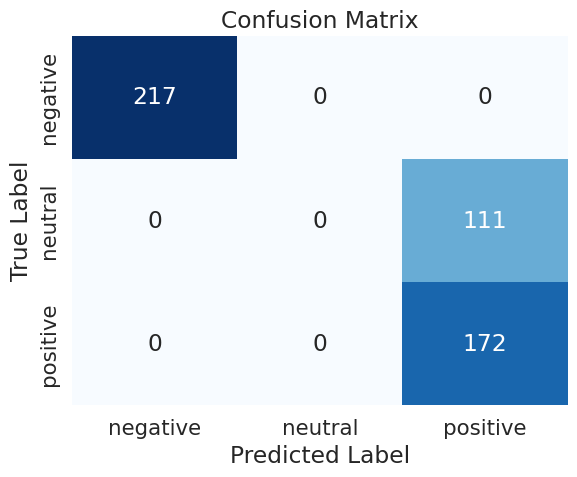

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Define the example and labels
examples = df['Text'].tolist()
labels = df['Sentiment'].tolist()

# Initialize an empty list for predicted labels
predicted_labels = []

# Iterate over the examples
for example in examples:
    # Perform inference with the RoBERTa model
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }

    # Convert scores to predicted label
    predicted_label = scores_to_labels(scores_dict)
    
    # Add the predicted label to the list
    predicted_labels.append(predicted_label)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(labels, predicted_labels, labels=['negative', 'neutral', 'positive'])

# Plot the confusion matrix as a graph
sns.set(font_scale=1.4)  # Adjust the font scale for better readability
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])

# Add labels, title, and axis ticks
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


**Combine and compare**

<Figure size 100x100 with 0 Axes>

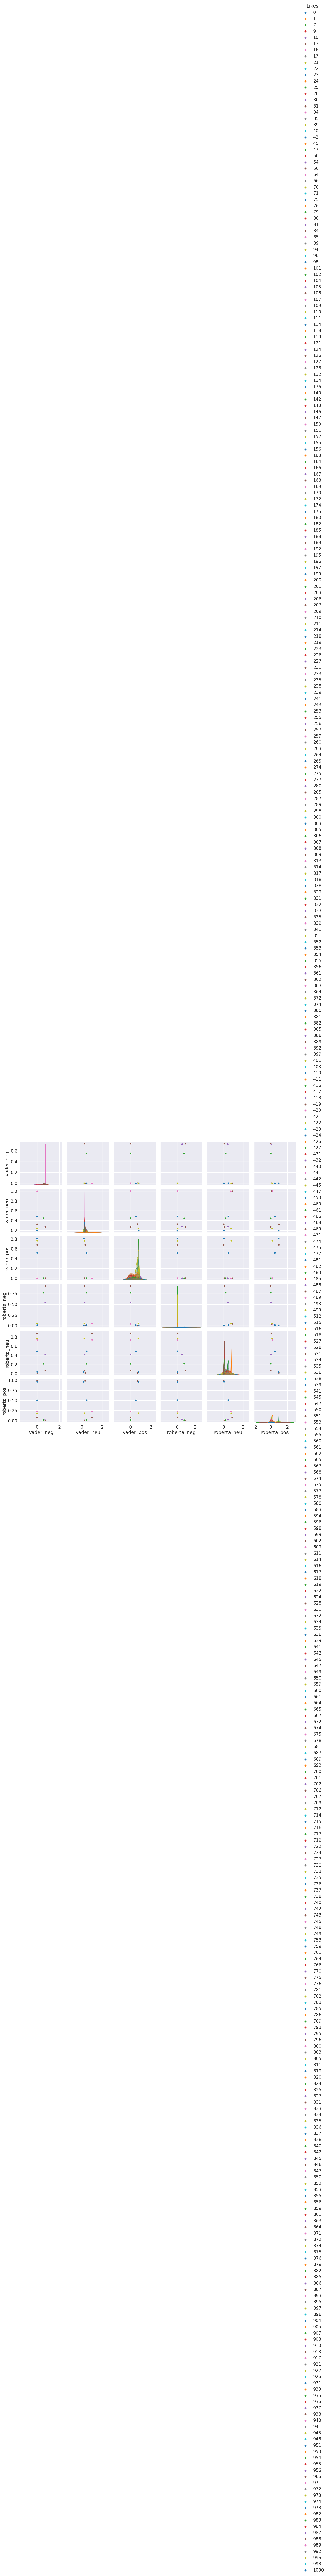

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))

sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Likes',
            palette='tab10')
plt.show()

**The Transformers Pipeline**

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
sent_pipeline('Feeling like a failure today, nothing seems to be going right.')

[{'label': 'NEGATIVE', 'score': 0.9997739195823669}]

In [ ]:
sent_pipeline('Feeling optimistic about the future, so many exciting things ahead!')

[{'label': 'POSITIVE', 'score': 0.9998522996902466}]